# Regularized Regression

To better understand the relationship between linear regression, ridge regression,and lasso, we will be working with synthetic data in this lab. Let's start by learning a bit more about our fake dataset and preparing our data for regression.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Seed for reproducibility
np.random.seed(0)

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples)


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
# Create and fit Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# Calculate RMSE and R^2 for Ridge regression

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R²:", ridge_r2)




Ridge Regression RMSE: 0.14410020171824975
Ridge Regression R²: 0.9984722762470865


In [8]:
# Create and fit Lasso regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# Calculate RMSE and R^2 for Lasso regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso Regression RMSE:", lasso_rmse)
print("Lasso Regression R²:", lasso_r2)

Lasso Regression RMSE: 1.2984978990079017
Lasso Regression R²: 0.8759496036905758


In [ ]:
# Visualize alphas against RMSE for lasso and ridge


plt.figure(figsize=(10, 5))
plt.plot(alphas, rmse_lasso, label='Lasso MSE')
plt.plot(alphas, rmse_ridge, label='Ridge MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Alpha for Lasso and Ridge Regression')
plt.legend()
plt.show()



In [ ]:
# Create function for creaing plot



### Coefficient Bar Plot

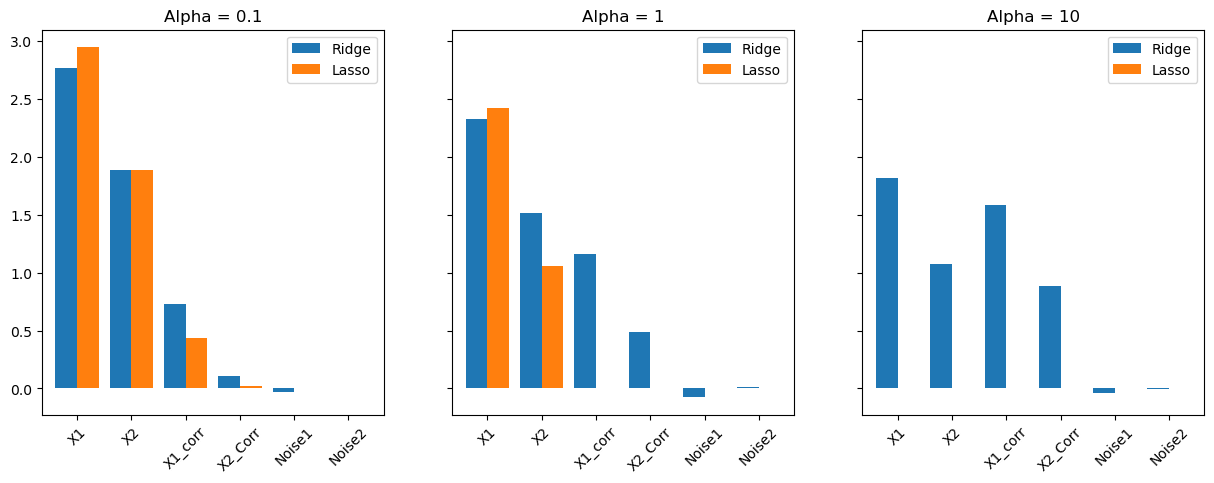

In [9]:
alphas = [0.1, 1, 10]
data = []


for alpha in alphas: 
    ridge = Ridge(alpha = alpha).fit(X,y)
    lasso = Lasso(alpha = alpha).fit(X,y)
    
    data.append(pd.DataFrame({
        'Ridge': ridge.coef_,
        'Lasso': lasso.coef_
    }, index = ['X1', 'X2', 'X1_corr', 'X2_Corr', 'Noise1', 'Noise2']))
                

fig, axes = plt.subplots(1, 3, figsize = (15,5), sharey = True)
for i,df in enumerate(data):
    df.plot.bar(ax = axes[i], width = 0.8)
    axes[i].set_title(f'Alpha = {alphas[i]}')
    axes[i].set_xticklabels(df.index, rotation = 45)
    
plt.show()
        
        

In [15]:
# Function for generating plot
def update_alphas(alpha, model_type):
    if model_type == 'Lasso':
        model = Lasso(alpha = alpha)
    else:
        model = Ridge(alpha = alpha)
        
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    
    plt.figure(figsize = (10,5))
    plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.5, label = f'Predictions (alpha = {alpha})')
    plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'k--',lw =2)
    plt.title(f'{model_type} Reression: Predictions vs Actual (alpha={alpha})')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.figtext(0.5, -.05, f'RMSe: {rmse}, R2: {r2}', ha = "center", fontsize = 12, bbox= {"facecolor": "orange"})
    plt.show()
    
    
#Create interactive widgets 
alpha_slider = FloatLogSlider(value = 1.0, base = 10, min = -3, max = 3, step = 0.1, description=  'Alpha')
model_selector = {'Lasso Model': 'Lasso', 'Ridge': 'Ridge'}

interact(update_alphas, alpha = alpha_slider, model_type = model_selector)


interactive(children=(FloatLogSlider(value=1.0, description='Alpha', max=3.0, min=-3.0), Dropdown(description=…

<function __main__.update_alphas(alpha, model_type)>